In [132]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Tensorflow

## Tensorflow의 다양한 함수들

In [2]:
tf.range(5)    # 0~4까지 텐서가 만들어진다

<tf.Tensor 'range:0' shape=(5,) dtype=int32>

In [3]:
# tf.linspace(시작값, 끝값, 구간)
tf.linspace(0.0, 5, 11)    # 시작값을 float 으로 해줘야 한다

<tf.Tensor 'LinSpace:0' shape=(11,) dtype=float32>

In [4]:
tf.zeros((2, 3))    # 상수 텐서

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=float32>

In [5]:
tf.ones((2, 3))

<tf.Tensor 'ones:0' shape=(2, 3) dtype=float32>

In [6]:
tf.fill([3, 3], 5)    # 3행 3열의 행렬에 전부 5가 들어가는 것

<tf.Tensor 'Fill:0' shape=(3, 3) dtype=int32>

In [7]:
# tf.zeros_like(x) 이면 x와 같은 구조의 행렬에 0들로 채워진다
tf.zeros_like([[3, 4, 5], [0, 0, 1]])    # 2행 3열에 0이 모두 채워진 채로 배열이 생성된다

<tf.Tensor 'zeros_like:0' shape=(2, 3) dtype=int32>

In [10]:
tf.set_random_seed(777)    # seed값에 따라 동일한 난수 생성
tf.random.set_random_seed(777)

In [ ]:
tf.random.shuffle([1, 2, 3, 4])    # 섞는다

In [ ]:
# tf.reshape(x, (a, b))    # 크기(구조)를 변환할 때 사용. x를 a행 b열로 변환.

In [ ]:
# tf.transpose()    # 전치행렬

In [14]:
r0 = tf.reshape(tf.range(12), (3, 4))
r0
sess = tf.Session()
sess.run(r0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
r1 = tf.slice(r0, [0, 1], [2, 3])    # 특정 부분만 추출. [0, 1],의 위치에서부터 2행 3열을 추출함.
sess.run(r1)

array([[1, 2, 3],
       [5, 6, 7]])

In [16]:
s1, s2 = tf.split(r0, num_or_size_splits=2, axis=1)
print(sess.run(r0))
print(sess.run(s1))
print(sess.run(s2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[ 2  3]
 [ 6  7]
 [10 11]]


## Tensorflow의 기본 연산들

In [19]:
a = tf.range(6)
a    # 그냥 출력하면 노드 정보만 나온다. 내용물을 알고싶다면 tf.Session().run() 해야 한다
sess.run(a)

array([0, 1, 2, 3, 4, 5])

In [22]:
a = tf.range(6, dtype=tf.int32)
b = 2 * tf.ones(6, dtype=tf.int32)
print(sess.run(tf.add(a, b)))
print(sess.run(tf.subtract(a, b)))
print(sess.run(tf.multiply(a, b)))
print(sess.run(tf.divide(a, b)))

[2 3 4 5 6 7]
[-2 -1  0  1  2  3]
[ 0  2  4  6  8 10]
[0.  0.5 1.  1.5 2.  2.5]


In [23]:
print(a+b)    # tf.add(a, b)

Tensor("add_3:0", shape=(6,), dtype=int32)


tf.abs(): 절대값 구하는 함수

tf.square(): 제곱 구하는 함수

tf.cumsum(): 누적합 구하는 함수

tf.sqrt(): 제곱근 구하는 함수

tf.maximum(): 최대값 구하는 함수

tf.minimum(): 최소값 구하는 함수

tf.reduce_로 시작하는 함수는 축을 기준으로 함수를 실행할 수 있다
* tf.reduce_mean(): axis 설정된 축 기준으로 평균을 구한다
* tf.reduce_sum()
* tf.reduce_min()
* tf.reduce_max()

In [26]:
# 내적
x = tf.constant([[2, 0], [0, 1]], dtype=tf.float32)
y = tf.constant([[1, 1], [1, 1]], dtype=tf.float32)
z = tf.matmul(x, y)
print(sess.run(z))

[[2. 2.]
 [1. 1.]]


In [27]:
# 역행렬
xinv = tf.linalg.inv(x)
print(sess.run(xinv))

[[0.5 0. ]
 [0.  1. ]]


tf.nn.sigmoid(): 로지스틱 함수인 시그모이드 함수

### 간단한 선형회귀 예제

In [44]:
# 회귀모델 (hf = wx+b)
# hf: 예측값
# hf - ytrain: 오류
xtrain = [1, 2, 3]    # 실제 입력값
ytrain = [1, 2, 3]    # 실제 결과값
# tf.Variable(초기값)
# tf.random_normal([n]): 정규분포를 따르는 난수를 n개 생성
b = tf.Variable(tf.random_normal([1]))
w = tf.Variable(tf.random_normal([1]))

hf = xtrain * w + b
cost = tf.reduce_mean(tf.square(hf - ytrain))    # reduce_mean(): 합의 평균을 구해준다

# opt = tf.train.GradientDescentOptimizer(0.01)    # 괄호 안에 learning rate를 넣어준다
# train = opt.minimize(cost)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

##### 여기까지 그래프 정의 부분 #####

##### 여기서부터 그래프 실행 부분 #####

sess = tf.Session()    # 1. 세션 생성
sess.run(tf.global_variables_initializer())    # 2. 변수 초기화
# 3. 트레이닝 (머신러닝)
# # 3-1. 어떻게 해야 되느냐
# print("step 1: ")
# print("w = ", sess.run(w), ", b = ", sess.run(b))
# print("cost = ", sess.run(cost))

# sess.run(train)

# print("step 2: ")
# print("w = ", sess.run(w), ", b = ", sess.run(b))
# print("cost = ", sess.run(cost))

# sess.run(train)

# print("step 3: ")
# print("w = ", sess.run(w), ", b = ", sess.run(b))
# print("cost = ", sess.run(cost))

# 3-2. 위 기본 구조를 for문으로 바꾸기
for step in range(2001):
    sess.run(train)
    print("step%d: " % step)
    print("w = ", sess.run(w), ", b = ", sess.run(b))
    print("cost = ", sess.run(cost))

step0: 
w =  [0.4561333] , b =  [-1.6566707]
cost =  7.728948
step1: 
w =  [0.573161] , b =  [-1.6017826]
cost =  6.1507473
step2: 
w =  [0.6770706] , b =  [-1.5526733]
cost =  4.9030657
step3: 
w =  [0.7693176] , b =  [-1.5087028]
cost =  3.9166422
step4: 
w =  [0.8511961] , b =  [-1.4693015]
cost =  3.1367302
step5: 
w =  [0.92385656] , b =  [-1.4339633]
cost =  2.5200548
step6: 
w =  [0.9883218] , b =  [-1.4022382]
cost =  2.032411
step7: 
w =  [1.0455012] , b =  [-1.3737264]
cost =  1.646761
step8: 
w =  [1.0962036] , b =  [-1.3480719]
cost =  1.3417312
step9: 
w =  [1.1411475] , b =  [-1.3249587]
cost =  1.1004294
step10: 
w =  [1.1809721] , b =  [-1.3041054]
cost =  0.90950155
step11: 
w =  [1.2162455] , b =  [-1.2852622]
cost =  0.75839335
step12: 
w =  [1.2474731] , b =  [-1.2682068]
cost =  0.63876057
step13: 
w =  [1.2751039] , b =  [-1.2527416]
cost =  0.54400843
step14: 
w =  [1.2995372] , b =  [-1.2386909]
cost =  0.46892428
step15: 
w =  [1.321128] , b =  [-1.2258985]
cos

cost =  0.064967446
step237: 
w =  [1.2953238] , b =  [-0.67134064]
cost =  0.06465546
step238: 
w =  [1.294614] , b =  [-0.6697268]
cost =  0.06434501
step239: 
w =  [1.2939057] , b =  [-0.6681168]
cost =  0.064036004
step240: 
w =  [1.2931992] , b =  [-0.6665107]
cost =  0.063728526
step241: 
w =  [1.2924943] , b =  [-0.66490847]
cost =  0.063422464
step242: 
w =  [1.2917912] , b =  [-0.66331005]
cost =  0.0631179
step243: 
w =  [1.2910898] , b =  [-0.6617155]
cost =  0.06281481
step244: 
w =  [1.29039] , b =  [-0.6601248]
cost =  0.062513165
step245: 
w =  [1.2896919] , b =  [-0.65853786]
cost =  0.06221297
step246: 
w =  [1.2889955] , b =  [-0.65695477]
cost =  0.06191421
step247: 
w =  [1.2883008] , b =  [-0.6553755]
cost =  0.061616886
step248: 
w =  [1.2876077] , b =  [-0.6538]
cost =  0.061321
step249: 
w =  [1.2869163] , b =  [-0.6522283]
cost =  0.061026525
step250: 
w =  [1.2862265] , b =  [-0.6506604]
cost =  0.060733486
step251: 
w =  [1.2855384] , b =  [-0.64909625]
cost 

w =  [1.2191215] , b =  [-0.49811438]
cost =  0.035594065
step362: 
w =  [1.2185947] , b =  [-0.49691695]
cost =  0.03542315
step363: 
w =  [1.2180692] , b =  [-0.49572238]
cost =  0.035253063
step364: 
w =  [1.2175449] , b =  [-0.4945307]
cost =  0.03508373
step365: 
w =  [1.217022] , b =  [-0.4933419]
cost =  0.034915272
step366: 
w =  [1.2165003] , b =  [-0.49215594]
cost =  0.03474759
step367: 
w =  [1.2159798] , b =  [-0.49097282]
cost =  0.03458075
step368: 
w =  [1.2154607] , b =  [-0.48979256]
cost =  0.03441468
step369: 
w =  [1.2149427] , b =  [-0.48861513]
cost =  0.03424944
step370: 
w =  [1.2144259] , b =  [-0.48744053]
cost =  0.034084935
step371: 
w =  [1.2139105] , b =  [-0.48626876]
cost =  0.03392126
step372: 
w =  [1.2133962] , b =  [-0.4850998]
cost =  0.03375839
step373: 
w =  [1.2128832] , b =  [-0.48393366]
cost =  0.033596274
step374: 
w =  [1.2123715] , b =  [-0.48277032]
cost =  0.03343494
step375: 
w =  [1.2118609] , b =  [-0.48160976]
cost =  0.03327437
step

w =  [1.1614118] , b =  [-0.3669269]
cost =  0.01931428
step489: 
w =  [1.1610237] , b =  [-0.36604485]
cost =  0.019221554
step490: 
w =  [1.1606367] , b =  [-0.3651649]
cost =  0.019129217
step491: 
w =  [1.1602505] , b =  [-0.36428708]
cost =  0.019037358
step492: 
w =  [1.1598653] , b =  [-0.36341137]
cost =  0.018945938
step493: 
w =  [1.1594809] , b =  [-0.36253774]
cost =  0.018854951
step494: 
w =  [1.1590976] , b =  [-0.36166623]
cost =  0.018764414
step495: 
w =  [1.1587151] , b =  [-0.3607968]
cost =  0.018674301
step496: 
w =  [1.1583335] , b =  [-0.35992947]
cost =  0.01858463
step497: 
w =  [1.1579529] , b =  [-0.35906422]
cost =  0.018495413
step498: 
w =  [1.1575732] , b =  [-0.35820106]
cost =  0.018406577
step499: 
w =  [1.1571944] , b =  [-0.35733998]
cost =  0.01831818
step500: 
w =  [1.1568165] , b =  [-0.35648096]
cost =  0.018230215
step501: 
w =  [1.1564395] , b =  [-0.355624]
cost =  0.018142678
step502: 
w =  [1.1560634] , b =  [-0.35476908]
cost =  0.01805555

w =  [1.1203407] , b =  [-0.27356264]
cost =  0.010735761
step611: 
w =  [1.1200514] , b =  [-0.27290502]
cost =  0.010684202
step612: 
w =  [1.1197628] , b =  [-0.27224898]
cost =  0.010632898
step613: 
w =  [1.1194749] , b =  [-0.27159452]
cost =  0.0105818445
step614: 
w =  [1.1191877] , b =  [-0.27094162]
cost =  0.010531017
step615: 
w =  [1.1189013] , b =  [-0.2702903]
cost =  0.010480452
step616: 
w =  [1.1186154] , b =  [-0.26964054]
cost =  0.010430141
step617: 
w =  [1.1183302] , b =  [-0.26899233]
cost =  0.010380037
step618: 
w =  [1.1180458] , b =  [-0.26834568]
cost =  0.010330209
step619: 
w =  [1.117762] , b =  [-0.2677006]
cost =  0.010280584
step620: 
w =  [1.1174788] , b =  [-0.2670571]
cost =  0.0102312155
step621: 
w =  [1.1171964] , b =  [-0.2664151]
cost =  0.010182087
step622: 
w =  [1.1169147] , b =  [-0.26577464]
cost =  0.010133189
step623: 
w =  [1.1166337] , b =  [-0.26513574]
cost =  0.010084538
step624: 
w =  [1.1163533] , b =  [-0.26449835]
cost =  0.010

step848: 
w =  [1.0678638] , b =  [-0.15427035]
cost =  0.003414159
step849: 
w =  [1.0677006] , b =  [-0.15389949]
cost =  0.0033977693
step850: 
w =  [1.0675379] , b =  [-0.15352952]
cost =  0.0033814518
step851: 
w =  [1.0673755] , b =  [-0.15316045]
cost =  0.0033652063
step852: 
w =  [1.0672135] , b =  [-0.15279226]
cost =  0.0033490546
step853: 
w =  [1.067052] , b =  [-0.15242496]
cost =  0.0033329704
step854: 
w =  [1.0668908] , b =  [-0.15205854]
cost =  0.0033169694
step855: 
w =  [1.06673] , b =  [-0.151693]
cost =  0.0033010338
step856: 
w =  [1.0665696] , b =  [-0.15132834]
cost =  0.0032851847
step857: 
w =  [1.0664096] , b =  [-0.15096456]
cost =  0.0032694116
step858: 
w =  [1.06625] , b =  [-0.15060166]
cost =  0.003253714
step859: 
w =  [1.0660907] , b =  [-0.15023962]
cost =  0.0032380854
step860: 
w =  [1.0659318] , b =  [-0.14987846]
cost =  0.0032225351
step861: 
w =  [1.0657732] , b =  [-0.14951816]
cost =  0.003207056
step862: 
w =  [1.0656152] , b =  [-0.149158

w =  [1.0492738] , b =  [-0.11201112]
cost =  0.0017998675
step982: 
w =  [1.0491554] , b =  [-0.11174185]
cost =  0.0017912326
step983: 
w =  [1.0490372] , b =  [-0.11147323]
cost =  0.0017826232
step984: 
w =  [1.0489193] , b =  [-0.11120525]
cost =  0.0017740655
step985: 
w =  [1.0488018] , b =  [-0.11093792]
cost =  0.001765546
step986: 
w =  [1.0486845] , b =  [-0.11067123]
cost =  0.0017570654
step987: 
w =  [1.0485674] , b =  [-0.11040518]
cost =  0.001748635
step988: 
w =  [1.0484507] , b =  [-0.11013978]
cost =  0.0017402334
step989: 
w =  [1.0483342] , b =  [-0.10987502]
cost =  0.0017318823
step990: 
w =  [1.048218] , b =  [-0.10961089]
cost =  0.0017235648
step991: 
w =  [1.0481021] , b =  [-0.10934739]
cost =  0.0017152866
step992: 
w =  [1.0479865] , b =  [-0.10908452]
cost =  0.0017070469
step993: 
w =  [1.0478711] , b =  [-0.10882229]
cost =  0.0016988494
step994: 
w =  [1.0477561] , b =  [-0.10856069]
cost =  0.0016906871
step995: 
w =  [1.0476413] , b =  [-0.10829972]

cost =  0.0010149977
step1101: 
w =  [1.0369133] , b =  [-0.08391272]
cost =  0.0010101242
step1102: 
w =  [1.0368246] , b =  [-0.083711]
cost =  0.0010052744
step1103: 
w =  [1.036736] , b =  [-0.08350976]
cost =  0.001000447
step1104: 
w =  [1.0366477] , b =  [-0.083309]
cost =  0.0009956405
step1105: 
w =  [1.0365596] , b =  [-0.08310873]
cost =  0.0009908614
step1106: 
w =  [1.0364717] , b =  [-0.08290894]
cost =  0.0009861012
step1107: 
w =  [1.0363841] , b =  [-0.08270963]
cost =  0.0009813682
step1108: 
w =  [1.0362966] , b =  [-0.0825108]
cost =  0.0009766569
step1109: 
w =  [1.0362093] , b =  [-0.08231245]
cost =  0.0009719667
step1110: 
w =  [1.0361223] , b =  [-0.08211458]
cost =  0.00096729497
step1111: 
w =  [1.0360355] , b =  [-0.08191717]
cost =  0.0009626501
step1112: 
w =  [1.0359489] , b =  [-0.08172025]
cost =  0.0009580289
step1113: 
w =  [1.0358624] , b =  [-0.0815238]
cost =  0.00095342606
step1114: 
w =  [1.0357763] , b =  [-0.08132782]
cost =  0.00094884983
step

cost =  0.0005779233
step1218: 
w =  [1.027854] , b =  [-0.0633185]
cost =  0.0005751495
step1219: 
w =  [1.027787] , b =  [-0.06316629]
cost =  0.0005723855
step1220: 
w =  [1.0277202] , b =  [-0.06301444]
cost =  0.0005696382
step1221: 
w =  [1.0276536] , b =  [-0.06286296]
cost =  0.0005669042
step1222: 
w =  [1.027587] , b =  [-0.06271184]
cost =  0.0005641811
step1223: 
w =  [1.0275208] , b =  [-0.06256109]
cost =  0.00056147436
step1224: 
w =  [1.0274546] , b =  [-0.0624107]
cost =  0.00055877777
step1225: 
w =  [1.0273886] , b =  [-0.06226067]
cost =  0.0005560932
step1226: 
w =  [1.0273228] , b =  [-0.062111]
cost =  0.0005534241
step1227: 
w =  [1.0272571] , b =  [-0.06196169]
cost =  0.000550767
step1228: 
w =  [1.0271915] , b =  [-0.06181274]
cost =  0.0005481199
step1229: 
w =  [1.0271262] , b =  [-0.06166415]
cost =  0.000545487
step1230: 
w =  [1.027061] , b =  [-0.06151591]
cost =  0.00054287014
step1231: 
w =  [1.0269959] , b =  [-0.06136803]
cost =  0.0005402619
step12

w =  [1.0207666] , b =  [-0.04720725]
cost =  0.0003196935
step1341: 
w =  [1.0207167] , b =  [-0.04709377]
cost =  0.00031815932
step1342: 
w =  [1.0206668] , b =  [-0.04698056]
cost =  0.00031663236
step1343: 
w =  [1.0206171] , b =  [-0.04686762]
cost =  0.00031511317
step1344: 
w =  [1.0205675] , b =  [-0.04675495]
cost =  0.00031360114
step1345: 
w =  [1.0205181] , b =  [-0.04664256]
cost =  0.0003120925
step1346: 
w =  [1.0204687] , b =  [-0.04653043]
cost =  0.0003105934
step1347: 
w =  [1.0204195] , b =  [-0.04641857]
cost =  0.00030909953
step1348: 
w =  [1.0203704] , b =  [-0.04630698]
cost =  0.00030761515
step1349: 
w =  [1.0203214] , b =  [-0.04619565]
cost =  0.00030613874
step1350: 
w =  [1.0202725] , b =  [-0.04608459]
cost =  0.0003046694
step1351: 
w =  [1.0202237] , b =  [-0.0459738]
cost =  0.00030320755
step1352: 
w =  [1.0201751] , b =  [-0.04586327]
cost =  0.0003017527
step1353: 
w =  [1.0201266] , b =  [-0.04575301]
cost =  0.0003003011
step1354: 
w =  [1.02007

w =  [1.0154823] , b =  [-0.03519497]
cost =  0.00017769732
step1463: 
w =  [1.0154451] , b =  [-0.03511037]
cost =  0.00017684205
step1464: 
w =  [1.015408] , b =  [-0.03502596]
cost =  0.00017599395
step1465: 
w =  [1.015371] , b =  [-0.03494176]
cost =  0.00017515167
step1466: 
w =  [1.015334] , b =  [-0.03485777]
cost =  0.00017430754
step1467: 
w =  [1.0152972] , b =  [-0.03477397]
cost =  0.00017347051
step1468: 
w =  [1.0152605] , b =  [-0.03469038]
cost =  0.00017263881
step1469: 
w =  [1.0152237] , b =  [-0.03460699]
cost =  0.00017181
step1470: 
w =  [1.0151871] , b =  [-0.0345238]
cost =  0.00017098429
step1471: 
w =  [1.0151507] , b =  [-0.03444081]
cost =  0.00017016492
step1472: 
w =  [1.0151142] , b =  [-0.03435802]
cost =  0.00016934557
step1473: 
w =  [1.0150778] , b =  [-0.03427543]
cost =  0.00016853212
step1474: 
w =  [1.0150416] , b =  [-0.03419303]
cost =  0.00016772388
step1475: 
w =  [1.0150055] , b =  [-0.03411083]
cost =  0.00016691803
step1476: 
w =  [1.01496

w =  [1.0114323] , b =  [-0.02598824]
cost =  9.688864e-05
step1589: 
w =  [1.0114048] , b =  [-0.02592577]
cost =  9.642261e-05
step1590: 
w =  [1.0113773] , b =  [-0.02586344]
cost =  9.596066e-05
step1591: 
w =  [1.01135] , b =  [-0.02580127]
cost =  9.549925e-05
step1592: 
w =  [1.0113227] , b =  [-0.02573925]
cost =  9.504126e-05
step1593: 
w =  [1.0112956] , b =  [-0.02567737]
cost =  9.458434e-05
step1594: 
w =  [1.0112684] , b =  [-0.02561564]
cost =  9.413017e-05
step1595: 
w =  [1.0112413] , b =  [-0.02555406]
cost =  9.367717e-05
step1596: 
w =  [1.0112143] , b =  [-0.02549263]
cost =  9.3228184e-05
step1597: 
w =  [1.0111873] , b =  [-0.02543135]
cost =  9.278059e-05
step1598: 
w =  [1.0111604] , b =  [-0.02537022]
cost =  9.233601e-05
step1599: 
w =  [1.0111336] , b =  [-0.02530923]
cost =  9.189042e-05
step1600: 
w =  [1.0111068] , b =  [-0.02524838]
cost =  9.1450864e-05
step1601: 
w =  [1.0110801] , b =  [-0.02518769]
cost =  9.101061e-05
step1602: 
w =  [1.0110536] , b

cost =  5.3083775e-05
step1714: 
w =  [1.0084417] , b =  [-0.01918989]
cost =  5.282824e-05
step1715: 
w =  [1.0084214] , b =  [-0.01914376]
cost =  5.257411e-05
step1716: 
w =  [1.0084012] , b =  [-0.01909774]
cost =  5.232163e-05
step1717: 
w =  [1.008381] , b =  [-0.01905183]
cost =  5.2071508e-05
step1718: 
w =  [1.0083609] , b =  [-0.01900604]
cost =  5.182066e-05
step1719: 
w =  [1.0083407] , b =  [-0.01896035]
cost =  5.157186e-05
step1720: 
w =  [1.0083207] , b =  [-0.01891477]
cost =  5.1324023e-05
step1721: 
w =  [1.0083007] , b =  [-0.0188693]
cost =  5.107666e-05
step1722: 
w =  [1.0082808] , b =  [-0.01882394]
cost =  5.083277e-05
step1723: 
w =  [1.0082608] , b =  [-0.01877869]
cost =  5.0588384e-05
step1724: 
w =  [1.0082409] , b =  [-0.01873356]
cost =  5.0345607e-05
step1725: 
w =  [1.0082211] , b =  [-0.01868852]
cost =  5.0103947e-05
step1726: 
w =  [1.0082014] , b =  [-0.0186436]
cost =  4.986316e-05
step1727: 
w =  [1.0081817] , b =  [-0.01859878]
cost =  4.9624254

w =  [1.0061145] , b =  [-0.01389981]
cost =  2.77163e-05
step1849: 
w =  [1.0060998] , b =  [-0.01386639]
cost =  2.7583417e-05
step1850: 
w =  [1.0060852] , b =  [-0.01383306]
cost =  2.745077e-05
step1851: 
w =  [1.0060705] , b =  [-0.0137998]
cost =  2.731818e-05
step1852: 
w =  [1.006056] , b =  [-0.01376662]
cost =  2.7188575e-05
step1853: 
w =  [1.0060414] , b =  [-0.01373353]
cost =  2.7056487e-05
step1854: 
w =  [1.0060269] , b =  [-0.01370052]
cost =  2.692755e-05
step1855: 
w =  [1.0060123] , b =  [-0.01366758]
cost =  2.6797577e-05
step1856: 
w =  [1.0059979] , b =  [-0.01363472]
cost =  2.6669435e-05
step1857: 
w =  [1.0059835] , b =  [-0.01360194]
cost =  2.654134e-05
step1858: 
w =  [1.005969] , b =  [-0.01356924]
cost =  2.6413292e-05
step1859: 
w =  [1.0059547] , b =  [-0.01353662]
cost =  2.6286676e-05
step1860: 
w =  [1.0059404] , b =  [-0.01350408]
cost =  2.6160793e-05
step1861: 
w =  [1.0059261] , b =  [-0.01347161]
cost =  2.6034953e-05
step1862: 
w =  [1.005912]

w =  [1.0045259] , b =  [-0.01028848]
cost =  1.5185217e-05
step1974: 
w =  [1.004515] , b =  [-0.01026375]
cost =  1.5112241e-05
step1975: 
w =  [1.0045042] , b =  [-0.01023908]
cost =  1.5039671e-05
step1976: 
w =  [1.0044934] , b =  [-0.01021446]
cost =  1.4967501e-05
step1977: 
w =  [1.0044825] , b =  [-0.01018991]
cost =  1.4895311e-05
step1978: 
w =  [1.0044718] , b =  [-0.01016541]
cost =  1.4824006e-05
step1979: 
w =  [1.004461] , b =  [-0.01014097]
cost =  1.4753098e-05
step1980: 
w =  [1.0044503] , b =  [-0.01011659]
cost =  1.468207e-05
step1981: 
w =  [1.0044396] , b =  [-0.01009228]
cost =  1.4611534e-05
step1982: 
w =  [1.0044289] , b =  [-0.01006801]
cost =  1.454149e-05
step1983: 
w =  [1.0044183] , b =  [-0.01004381]
cost =  1.44711985e-05
step1984: 
w =  [1.0044076] , b =  [-0.01001966]
cost =  1.4401808e-05
step1985: 
w =  [1.004397] , b =  [-0.00999557]
cost =  1.4333411e-05
step1986: 
w =  [1.0043864] , b =  [-0.00997154]
cost =  1.4263879e-05
step1987: 
w =  [1.00

### placeholder를 사용한 학습

In [45]:
w = tf.Variable(tf.random_normal([1], name="weight"))
b = tf.Variable(tf.random_normal([1], name="bias"))

In [46]:
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

In [47]:
hf = x * w + b
cost = tf.reduce_mean(tf.square(hf - y))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [50]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cv, wv, bv, _ = sess.run([cost, w, b, train], feed_dict={x:[1, 2, 3], y:[1, 2, 3]})    # 한번에 여러개 실행할 때는 대괄호로 묶는다
    if step % 20 == 0:
        print("step: ", step, ", cost: ", cv, ", w: ", wv, ", b: ", bv)

step:  0 , cost:  4.052016 , w:  [-0.33818716] , b:  [1.2348578]
step:  20 , cost:  0.33929905 , w:  [0.29605258] , b:  [1.4281619]
step:  40 , cost:  0.2778666 , w:  [0.38353905] , b:  [1.3849757]
step:  60 , cost:  0.25208828 , w:  [0.41769075] , b:  [1.3221656]
step:  80 , cost:  0.22894812 , w:  [0.44555044] , b:  [1.2602458]
step:  100 , cost:  0.20793432 , w:  [0.47165453] , b:  [1.2010393]
step:  120 , cost:  0.18884923 , w:  [0.4964893] , b:  [1.1445968]
step:  140 , cost:  0.17151594 , w:  [0.5201528] , b:  [1.0908052]
step:  160 , cost:  0.15577348 , w:  [0.54270405] , b:  [1.0395412]
step:  180 , cost:  0.14147599 , w:  [0.5641952] , b:  [0.9906868]
step:  200 , cost:  0.12849075 , w:  [0.5846764] , b:  [0.94412804]
step:  220 , cost:  0.11669729 , w:  [0.6041952] , b:  [0.8997575]
step:  240 , cost:  0.10598636 , w:  [0.6227965] , b:  [0.8574723]
step:  260 , cost:  0.09625856 , w:  [0.6405236] , b:  [0.81717426]
step:  280 , cost:  0.087423585 , w:  [0.65741765] , b:  [0.7

#### 시각화 1

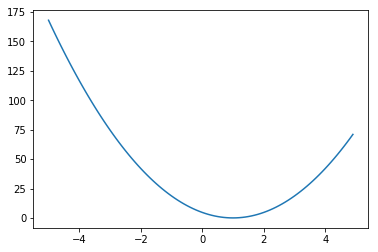

In [52]:
xtrain = [1, 2, 3]
ytrain = [1, 2, 3]
w = tf.placeholder(tf.float32)
hf = xtrain * w
cost = tf.reduce_mean(tf.square(hf - ytrain))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

wvList = []
cvList = []
for step in range(-50, 50):
    fw = step * 0.1
    cv, wv = sess.run([cost, w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.plot(wvList, cvList)

In [69]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
b = tf.Variable([-.3], tf.float32)
w = tf.Variable([100.], tf.float32)

hf = x * w + b
loss = tf.reduce_sum(tf.square(hf - y))

train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

xtrain = [1, 2, 3, 4]
ytrain = [0, -1, -2, -3]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict={x:xtrain, y:ytrain})
    if step % 20 == 0:
        wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})
        print("step: %d, w: %s, b: %s, loss: %s" % (step, wv, bv, lv))
# wv, bv, lv = sess.run([w, b, loss], feed_dict={x:xtrain, y:ytrain})
# print("w: %s, b: %s, loss: %s" % (wv, bv, lv))

step: 0, w: [39.66], b: [-20.395998], loss: 34029.0
step: 20, w: [7.439225], b: [-23.812351], loss: 411.28638
step: 40, w: [5.6321735], b: [-18.4994], loss: 254.01004
step: 60, w: [4.212058], b: [-14.324087], loss: 156.87642
step: 80, w: [3.096025], b: [-11.042812], loss: 96.88673
step: 100, w: [2.2189624], b: [-8.464142], loss: 59.837154
step: 120, w: [1.5297011], b: [-6.4376297], loss: 36.955368
step: 140, w: [0.98802805], b: [-4.8450446], loss: 22.823597
step: 160, w: [0.562341], b: [-3.593473], loss: 14.095835
step: 180, w: [0.22780417], b: [-2.609894], loss: 8.705573
step: 200, w: [-0.03509986], b: [-1.8369241], loss: 5.3765526
step: 220, w: [-0.24170944], b: [-1.2294667], loss: 3.3205535
step: 240, w: [-0.40407863], b: [-0.7520815], loss: 2.0507705
step: 260, w: [-0.53168046], b: [-0.3769166], loss: 1.266554
step: 280, w: [-0.6319595], b: [-0.08208393], loss: 0.78222257
step: 300, w: [-0.7107663], b: [0.14961761], loss: 0.48309994
step: 320, w: [-0.7726985], b: [0.331706], loss: 

In [75]:
xtrain = [1, 2, 3]
ytrain = [2, 4, 7]
w = tf.Variable(5.0)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hf = x * w
cost = tf.reduce_mean(tf.square(hf-y))

# train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)  << 이걸 아래 4줄로 풀어쓸 수 있다
lr = 0.01
gradient = tf.reduce_mean((w * x - y) * x)
descent = w - lr * gradient
update = w.assign(descent)    # a.assign(b): a를 b로 업데이트해라

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    sess.run(update, feed_dict={x:xtrain, y:ytrain})
    print(step, sess.run(cost, feed_dict={x:xtrain, y:ytrain}))
    
# for step in range(100):
#     print(step, sess.run(w))
#     sess.run(train)

0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


#### 시각화 2

In [79]:
num_points = 200
vectors_set = []

for i in range(num_points):
    x = np.random.normal(5, 5) + 15    # 평균이 5, 표준편차가 5인 정규분포에서 난수를 뽑은 값에 15를 더함
    y = x * 1000 + np.random.normal(0, 3) * 1000
    vectors_set.append([x, y])

xdata = [v[0] for v in vectors_set]
ydata = [v[1] for v in vectors_set]

W0729 14:46:37.045725  1876 legend.py:1289] No handles with labels found to put in legend.


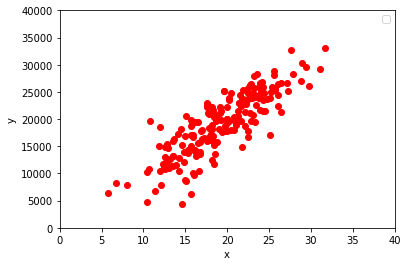

In [82]:
plt.plot(xdata, ydata, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0, 40])
plt.ylim([0, 40000])
plt.legend()

In [93]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w * xdata + b

loss = tf.reduce_mean(tf.square(y - ydata))
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())    # tf.global_variables_initializer()와 같다

0 [994.9755] [47.72059]
0 9259151.0


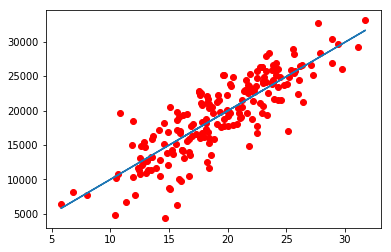

1 [994.9775] [47.680138]
1 9259149.0


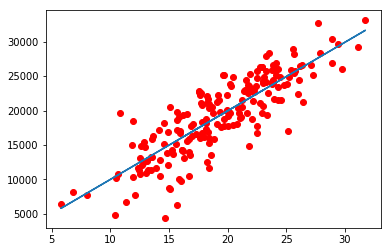

2 [994.9795] [47.639694]
2 9259148.0


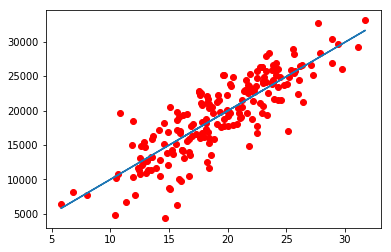

3 [994.9814] [47.59925]
3 9259147.0


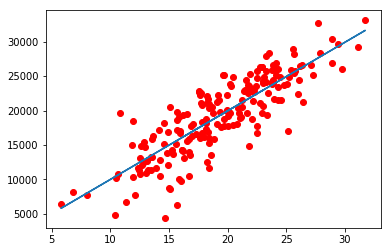

4 [994.9834] [47.558815]
4 9259144.0


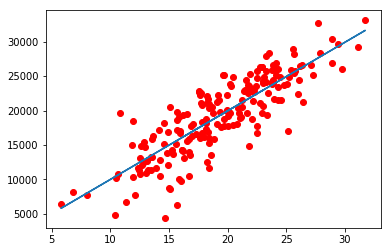

5 [994.9854] [47.518383]
5 9259143.0


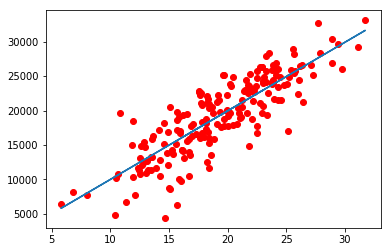

6 [994.98737] [47.477955]
6 9259141.0


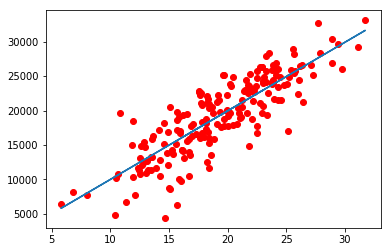

7 [994.9893] [47.43753]
7 9259140.0


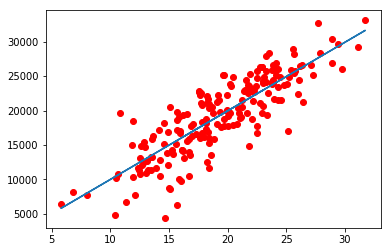

8 [994.9913] [47.397114]
8 9259139.0


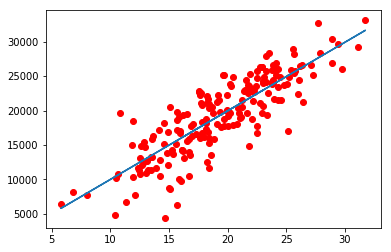

9 [994.9933] [47.3567]
9 9259136.0


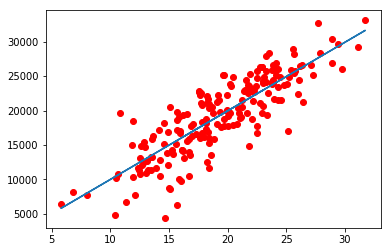

In [96]:
for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    plt.plot(xdata, ydata, "ro")
    plt.plot(xdata, sess.run(w) * xdata + sess.run(b))
    plt.show()

# Keras

keras 패키지: 텐서플로우를 엔진으로 사용하는 파이썬 패키지
* 신경망을 쉽게 구현할 수 있도록 해준다
* 연습용 데이터셋 제공 (CIFAR10, CIFAR100)

In [102]:
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

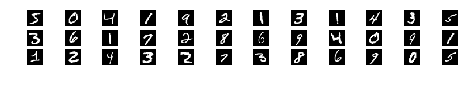

In [104]:
plt.figure(figsize=(8, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(xtrain[i], cmap="gray")
    plt.axis("off")
plt.show()

In [113]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [127]:
xtrain = xtrain.reshape(60000, 28*28).astype("float32")/255.0
xtest = xtest.reshape(10000, 28*28).astype("float32")/255.0
print(xtrain.shape, xtrain.dtype)
print(xtest.shape, xtrain.dtype)
print(ytrain[:10])

(60000, 784) float32
(10000, 784) float32
[5 0 4 1 9 2 1 3 1 4]


In [129]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
print(ytrain[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## keras로 신경망 구성

keras로 신경망을 구성하는 순서
1. Sequential 클래스를 이용해서 Sequential 객체 생성
2. add 메서드를 사용해서 층(layer)을 추가
    * 주의1: 입력부터 순서대로 추가해줘야 함 (추가된 순서대로 네트워크 구성)
    * 주의2: shape 체크
    * 주의3: activation 활성화 설정
3. compile 메서드를 통해 모델 생성
    * loss, optimizer (알고리즘), 성능 기준 설정 알고리즘
4. fit 메서드로 트레이닝
    * 에폭 설정
        * 전체 데이터에 대해서 트레이닝을 얼마나 할건지
        * 예: 6만개 데이터가 있다면 1에폭 = 6만개 training, 10에폭 = 6만개 10번 training
    * 배치 크기 설정 (분할 모델링, 큐러너 등 사용)

### keras를 이용해 신경망 모델 만들어보기

In [133]:
from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)

In [138]:
model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))    # 출력 갯수가 15개
    # input_dim은 맨 처음에 입력받는 계층에만 있다.
model.add(Dense(10, activation="sigmoid"))    # 이전 계층의 출력 갯수가 이번 계층의 입력 갯수이므로 input_dim이 없다
model.compile(optimizer=SGD(lr=0.1), loss="mean_squared_error", metrics=["accuracy"])

In [139]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
